In [4]:
# Dependencies and setup
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
projections = pd.read_csv('../data/rawdata/population_projection_2050.csv')
projections.head()

,year,FIPS,county,total,male,female,Caucasian total,Caucasian male,Caucasian Female,African American total,...,African American Female,Latino Total,Latino Male,Latino Female,Asian Total,Asian Male,Asian Female,Other Total,Other Male,Other Female
0,2010,39,Brazoria County,313166,159000,154166,166674,83696,82978,36880,...,17502,86643,44846,41797,17013,8181,8832,5956,2899,3057
1,2011,39,Brazoria County,319061,161896,157165,167347,83993,83354,38220,...,18196,89537,46295,43242,17798,8580,9218,6159,3004,3155
2,2012,39,Brazoria County,325102,164870,160232,167970,84266,83704,39617,...,18927,92525,47796,44729,18600,8994,9606,6390,3124,3266
3,2013,39,Brazoria County,331162,167836,163326,168531,84499,84032,41055,...,19678,95561,49328,46233,19416,9405,10011,6599,3227,3372
4,2014,39,Brazoria County,337296,170856,166440,169017,84701,84316,42529,...,20450,98668,50898,47770,20258,9836,10422,6824,3342,3482


In [5]:
county_total = (projections["county"]).nunique()
population_total = (projections["total"]).sum()
year_total= (projections["year"]).count()

projections_df = pd.DataFrame({"The total population growth": [population_total],
                   "The years Evaluated":[year_total],
                   "The number of counties represented": [county_total]})

projections_df

,The total population growth,The years Evaluated,The number of counties represented
0,317408910,164,4


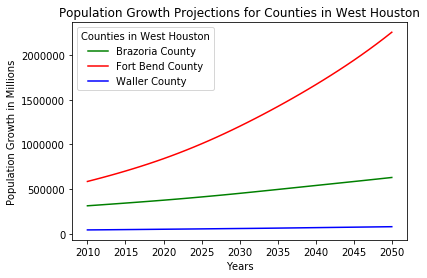

In [6]:
brazoria_county = projections[projections["county"] == "Brazoria County"].groupby([projections["year"]])
fort_bend_county = projections[projections["county"]=="Fort Bend County"].groupby([projections["year"]])
harris_county = projections[projections["county"]== "Harris County"].groupby([projections["year"]])
waller_county = projections[projections["county"]=="Waller County"].groupby([projections["year"]])

brazoria_x = brazoria_county["total"].sum()
brazoria_y = brazoria_county["year"].mean()


fort_x = fort_bend_county["total"].sum()
fort_y = fort_bend_county["year"].mean()

harris_x = harris_county["total"].sum()
harris_y = harris_county["year"].mean()

waller_x = waller_county["total"].sum()
waller_y = waller_county["year"].mean()

x = brazoria_y
y = brazoria_x

a = fort_y
b = fort_x

c = waller_y
d = waller_x

e= harris_y
f= harris_x

brazoria = plt.plot(x,y, color = 'green', alpha = 1.00, label = "Brazoria County")
fort = plt.plot(a,b, color = "red", alpha = 1.00, label = "Fort Bend County")
waller = plt.plot(c,d, color = "blue", alpha = 1.00, label = "Waller County")
#harris = plt.plot(e,f, color = "orange", alpha = 1.00, label = "Harris County")

legend = plt.legend(fontsize = 10, loc = "best", title= "Counties in West Houston")


plt.title("Population Growth Projections for Counties in West Houston")

plt.xlabel("Years")

plt.ylabel("Population Growth in Millions")

plt.savefig('../images/PopulationGrowth.png')

In [7]:
flood_probability = pd.read_csv ('../data/rawdata/flood_probability.csv')

flood_probability.head()

,Flood Year Probability,Upper Buffalo Bayou,Mason Creek,South Mayde Creek,Bear Creek,Langham Creek,Horsepen Creek
0,10 Year (10%),99.84,102.7,109.4,108.8,97.6,112.0
1,50 Year (2%),101.86,105.0,110.5,111.3,99.9,115.5
2,100 Year (1%),102.56,106.1,110.9,112.4,100.8,116.8
3,500 Year (0.2%),104.88,108.7,111.8,114.1,102.4,119.0
4,Harvey,100.30,107.8,111.9,114.6,109.4,115.9


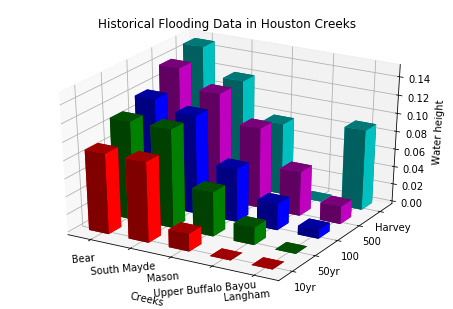

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = np.array([
# [.09,.11,.12,.14,.15],
# [.09,.12,.11,0.12,0.12],
# [.02,.05,.06,.09,.08],
# [0,0,.01,.02,.09],
# [0,.02,.03,.05,0] 
    

# [.09,.09,.02,0,0],
# [.11,.11,.05,0,0.02],
# [.12,.11,.06,.01,.03],
# [.14,.12,.09,.02,.05],
# [.15,.12,.08,.09,0],

# [.09,.09,.02,0,0],
# [.11,.11,.05,0.02,0],
# [.12,.11,.06,.03,.01],
# [.14,.12,.09,.05,.02],
# [.15,.12,.08,0,0.09],
    
[.09,.11,.12,.14,.15],
[.09,.11,.11,0.12,0.12],
[.02,.05,.06,.09,.08],
[0,.02,.03,.05,0],
[0,0,.01,.02,.09], 
        
 
    
])

 

creeks = ['Bear','South Mayde','Mason','Upper Buffalo Bayou','Langham']
projections = ['10yr','50yr','100','500','Harvey']

fig = plt.figure()
ax = Axes3D(fig)

lx= len(data[0]) 
ly= len(data[:,0]) # Work out matrix dimensions
#ly= lx[ly[:,0],:]
xpos = np.arange(.5,5,1)    # Set up a mesh of positions
ypos = np.arange(.5,5,1)
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()   # Convert positions to 1D array
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

#ax.set_zticks([80, 90, 100,110,120])

ax.set_zlim(0,.15)
# num_ticks = 5.
# ax.set_yticks(arange(num_ticks)/(num_ticks-1) * 50)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = ['r', 'g', 'b', 'm', 'c'] * lx


#ax.legend()
#lgd = ax.legend( [ 'Lag ' + str(lag) for lag in all_x], loc='center right', bbox_to_anchor=(1.3, 0.5))
ax.bar3d(ypos,xpos,zpos, dx, dy, dz, color=cs)
ax.set_title('Historical Flooding Data in Houston Creeks')
ax.set_xlabel('Creeks', labelpad = 15)
#ax.set_ylabel('Flood Projections')
ax.set_zlabel('Water height')
ax.w_xaxis.set_ticklabels(creeks, rotation = 5) 
ax.w_yaxis.set_ticklabels(projections)
plt.savefig('../images/3d.png')
